# Algorisme supervisat

Utilitzarem `polars` enlloc de `pandas` per usar el dataset eficientment:

In [1]:
# !pip install polars

## imports inicials

In [2]:
import polars as pl
from pathlib import Path

## data processing

In [3]:
job_descriptions = pl.read_csv(Path("dataset/job_descriptions.csv"))

In [4]:
job_descriptions.head()

Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,Preference,Contact Person,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
i64,str,str,str,str,str,f64,f64,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,str
1089843540111562,"""5 to 15 Years""","""M.Tech""","""$59K-$99K""","""Douglas""","""Isle of Man""",54.2361,-4.5481,"""Intern""",26801,"""2022-04-24""","""Female""","""Brandon Cunningham""","""001-381-930-7517x737""","""Digital Marketing Specialist""","""Social Media Manager""","""Snagajob""","""Social Media Managers oversee …","""{'Flexible Spending Accounts (…","""Social media platforms (e.g., …","""Manage and grow social media a…","""Icahn Enterprises""","""{""Sector"":""Diversified"",""Indus…"
398454096642776,"""2 to 12 Years""","""BCA""","""$56K-$116K""","""Ashgabat""","""Turkmenistan""",38.9697,59.5563,"""Intern""",100340,"""2022-12-19""","""Female""","""Francisco Larsen""","""461-509-4216""","""Web Developer""","""Frontend Web Developer""","""Idealist""","""Frontend Web Developers design…","""{'Health Insurance, Retirement…","""HTML, CSS, JavaScript Frontend…","""Design and code user interface…","""PNC Financial Services Group""","""{""Sector"":""Financial Services""…"
481640072963533,"""0 to 12 Years""","""PhD""","""$61K-$104K""","""Macao""","""Macao SAR, China""",22.1987,113.5439,"""Temporary""",84525,"""2022-09-14""","""Male""","""Gary Gibson""","""9687619505""","""Operations Manager""","""Quality Control Manager""","""Jobs2Careers""","""Quality Control Managers estab…","""{'Legal Assistance, Bonuses an…","""Quality control processes and …","""Establish and enforce quality …","""United Services Automobile Ass…","""{""Sector"":""Insurance"",""Industr…"
688192671473044,"""4 to 11 Years""","""PhD""","""$65K-$91K""","""Porto-Novo""","""Benin""",9.3077,2.3158,"""Full-Time""",129896,"""2023-02-25""","""Female""","""Joy Lucero""","""+1-820-643-5431x47576""","""Network Engineer""","""Wireless Network Engineer""","""FlexJobs""","""Wireless Network Engineers des…","""{'Transportation Benefits, Pro…","""Wireless network design and ar…","""Design, configure, and optimiz…","""Hess""","""{""Sector"":""Energy"",""Industry"":…"
117057806156508,"""1 to 12 Years""","""MBA""","""$64K-$87K""","""Santiago""","""Chile""",-35.6751,-71.5429,"""Intern""",53944,"""2022-10-11""","""Female""","""Julie Johnson""","""343.975.4702x9340""","""Event Manager""","""Conference Manager""","""Jobs2Careers""","""A Conference Manager coordinat…","""{'Flexible Spending Accounts (…","""Event planning Conference logi…","""Specialize in conference and c…","""Cairn Energy""","""{""Sector"":""Energy"",""Industry"":…"


Per a l'agorisme supervisat, pot ser interessant intentar predir el salari mínim a partir de les següents variables: l'experiència mínima, les qualificacions requerides, el país, el tipus de feina (temporal, intern...), la mida de l'empresa la preferència de gènere i embeddings amb la intenció d'agrupar similituds sobre el `Job title`, `Role`, `Job Description`, `Skills` i `Responsabilities`. 

Començem filtrant les columnes que no ens interessen:

In [5]:
job_descriptions = job_descriptions.drop(["Job Id", "Job Posting Date", "Job Portal", "Contact Person", "location", "latitude", "longitude", "Contact", "Benefits","Company", "Company Profile"])

In [98]:
job_descriptions.head()

Experience,Qualifications,Salary Range,Country,Work Type,Company Size,Preference,Job Title,Role,Job Description,skills,Responsibilities
str,str,str,str,str,i64,str,str,str,str,str,str
"""5 to 15 Years""","""M.Tech""","""$59K-$99K""","""Isle of Man""","""Intern""",26801,"""Female""","""Digital Marketing Specialist""","""Social Media Manager""","""Social Media Managers oversee …","""Social media platforms (e.g., …","""Manage and grow social media a…"
"""2 to 12 Years""","""BCA""","""$56K-$116K""","""Turkmenistan""","""Intern""",100340,"""Female""","""Web Developer""","""Frontend Web Developer""","""Frontend Web Developers design…","""HTML, CSS, JavaScript Frontend…","""Design and code user interface…"
"""0 to 12 Years""","""PhD""","""$61K-$104K""","""Macao SAR, China""","""Temporary""",84525,"""Male""","""Operations Manager""","""Quality Control Manager""","""Quality Control Managers estab…","""Quality control processes and …","""Establish and enforce quality …"
"""4 to 11 Years""","""PhD""","""$65K-$91K""","""Benin""","""Full-Time""",129896,"""Female""","""Network Engineer""","""Wireless Network Engineer""","""Wireless Network Engineers des…","""Wireless network design and ar…","""Design, configure, and optimiz…"
"""1 to 12 Years""","""MBA""","""$64K-$87K""","""Chile""","""Intern""",53944,"""Female""","""Event Manager""","""Conference Manager""","""A Conference Manager coordinat…","""Event planning Conference logi…","""Specialize in conference and c…"


Usem algunes visualitzacions útils per mostrar diferents característiques del dataset. Farem un subsampling per les dimensions del dataset:

In [ ]:
# !pip install seaborn wordcloud plotly nbformat

In [6]:
import plotly.express as px
import seaborn as sns   
import pandas as pd

from matplotlib import pyplot as plt
from wordcloud import WordCloud

In [ ]:
job_descriptions_sample_visualization = job_descriptions.sample(n=10000, seed=42).to_pandas()

In [8]:
job_descriptions_sample_visualization.head()

,Experience,Qualifications,Salary Range,Country,Work Type,Company Size,Preference,Job Title,Role,Job Description,skills,Responsibilities
0,3 to 9 Years,BA,$58K-$80K,Tanzania,Temporary,75325,Female,Social Worker,Child Welfare Worker,"Work with at-risk children and families, asses...",Child welfare policies and regulations Child p...,Provide support and counseling to children and...
1,5 to 9 Years,MBA,$57K-$91K,Bahrain,Contract,61995,Both,Pediatrician,Pediatric Specialist,Pediatric Specialists are doctors with experti...,Pediatric specialization Advanced pediatric ca...,Specialize in a specific area of pediatric med...
2,3 to 9 Years,BA,$59K-$129K,Seychelles,Part-Time,65926,Male,Urban Planner,City Planner,City Planners develop and implement urban plan...,Urban planning Zoning regulations Environmenta...,Plan and develop land use strategies for urban...
3,5 to 9 Years,B.Tech,$55K-$83K,Burundi,Full-Time,82229,Female,Public Relations Specialist,Media Relations Specialist,Media Relations Specialists manage relationshi...,Media relations Press releases Media outreach ...,Manage relationships with media outlets and jo...
4,3 to 12 Years,BA,$61K-$121K,"Macedonia, FYR",Intern,23722,Female,UX/UI Designer,Interaction Designer,Interaction Designers specialize in designing ...,Interaction design principles User behavior an...,"Work on interaction design, defining how users..."


Les distribucions d'algunes variables:

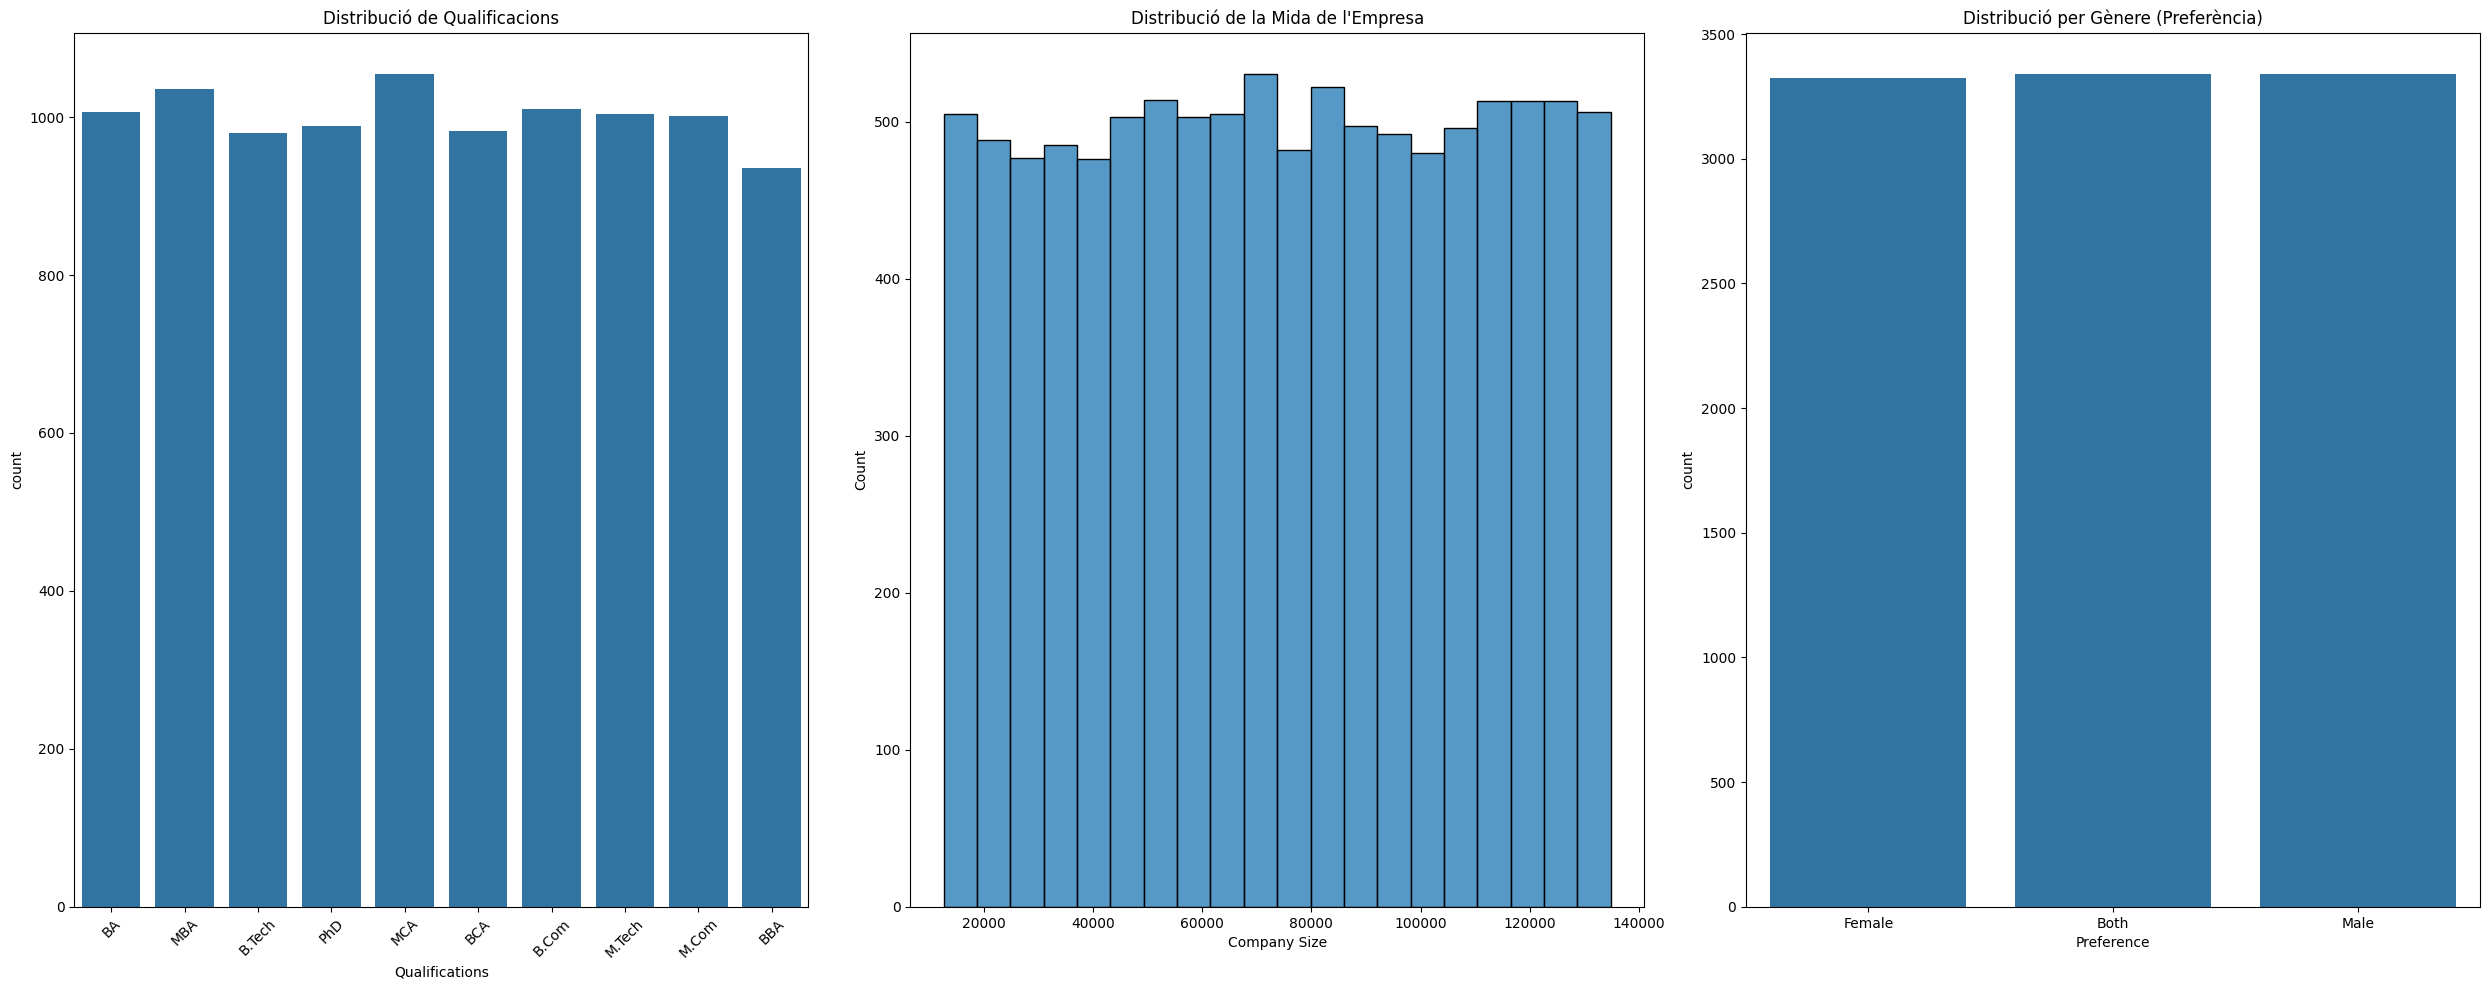

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(25, 10))

sns.countplot(data=job_descriptions_sample_visualization, x="Qualifications", ax=axes[0])
axes[0].set_title("Distribució de Qualificacions")
axes[0].tick_params(axis='x', rotation=45)

sns.histplot(data=job_descriptions_sample_visualization, x="Company Size", bins=20, ax=axes[1])
axes[1].set_title("Distribució de la Mida de l'Empresa")

sns.countplot(data=job_descriptions_sample_visualization, x="Preference", ax=axes[2])
axes[2].set_title("Distribució per Gènere (Preferència)")

plt.tight_layout()
plt.show()

C:\Users\alesa\AppData\Local\Temp\ipykernel_7296\782185341.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=job_descriptions_sample_visualization, x="Salary Group", order=labels, palette="Blues")


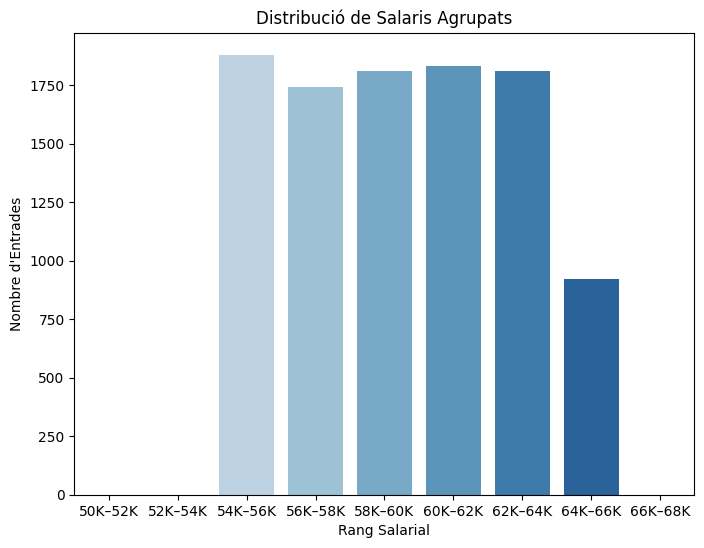

In [10]:
def extract_lower_bound(salary_str):
    try:
        lower = salary_str.split("-")[0].replace("$", "").replace("K", "").strip()
        return int(lower) * 1000
    except:
        return None

job_descriptions_sample_visualization["Salary_Lower"] = job_descriptions_sample_visualization["Salary Range"].apply(extract_lower_bound)

bins = [50000, 52000, 54000, 56000, 58000, 60000, 62000, 64000, 66000, 68000]
labels = ['50K–52K', '52K–54K', '54K–56K', '56K–58K', '58K–60K', '60K–62K', '62K–64K', '64K–66K', '66K–68K']
job_descriptions_sample_visualization["Salary Group"] = pd.cut(job_descriptions_sample_visualization["Salary_Lower"], bins=bins, labels=labels)

plt.figure(figsize=(8, 6))
sns.countplot(data=job_descriptions_sample_visualization, x="Salary Group", order=labels, palette="Blues")
plt.title("Distribució de Salaris Agrupats")
plt.xlabel("Rang Salarial")
plt.ylabel("Nombre d'Entrades")
plt.show()

Les paraules més comunes dins dels títols de les feines:

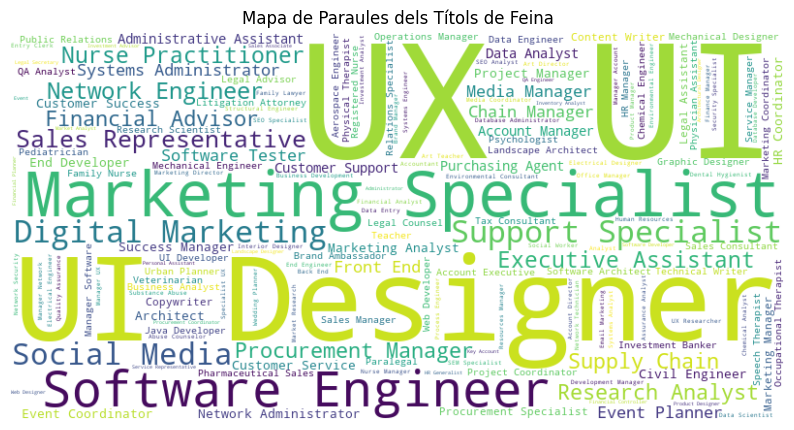

In [11]:
text = " ".join(job_descriptions_sample_visualization["Job Title"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Mapa de Paraules dels Títols de Feina")
plt.show()


Una mapa coroplètic dels països amb més ofertes de feiens:

In [16]:
country_counts = job_descriptions_sample_visualization["Country"].value_counts().reset_index()
country_counts.columns = ["Country", "Count"]

fig = px.choropleth(
    country_counts,
    locations="Country",
    locationmode="country names",  
    color="Count",
    color_continuous_scale="viridis",
    title="Nombre d'Entrades per País",
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    margin=dict(l=0, r=0, t=40, b=10), 
    title_x=0.5  
)
fig.show()

Seguidament convertim ens quedem amb l'experiència mínima i el salari mínim en un format utilitzable:

In [17]:
job_descriptions = job_descriptions.with_columns([
    pl.col("Experience").str.extract(r"(\d+)", 1).cast(pl.Int32).alias("Experience"),
    pl.col("Salary Range").str.extract(r"(\d+)", 1).cast(pl.Int32).alias("Salary") * 1000
])

In [18]:
job_descriptions = job_descriptions.drop(['Salary Range'])

In [19]:
job_descriptions.head()

Experience,Qualifications,Country,Work Type,Company Size,Preference,Job Title,Role,Job Description,skills,Responsibilities,Salary
i32,str,str,str,i64,str,str,str,str,str,str,i32
5,"""M.Tech""","""Isle of Man""","""Intern""",26801,"""Female""","""Digital Marketing Specialist""","""Social Media Manager""","""Social Media Managers oversee …","""Social media platforms (e.g., …","""Manage and grow social media a…",59000
2,"""BCA""","""Turkmenistan""","""Intern""",100340,"""Female""","""Web Developer""","""Frontend Web Developer""","""Frontend Web Developers design…","""HTML, CSS, JavaScript Frontend…","""Design and code user interface…",56000
0,"""PhD""","""Macao SAR, China""","""Temporary""",84525,"""Male""","""Operations Manager""","""Quality Control Manager""","""Quality Control Managers estab…","""Quality control processes and …","""Establish and enforce quality …",61000
4,"""PhD""","""Benin""","""Full-Time""",129896,"""Female""","""Network Engineer""","""Wireless Network Engineer""","""Wireless Network Engineers des…","""Wireless network design and ar…","""Design, configure, and optimiz…",65000
1,"""MBA""","""Chile""","""Intern""",53944,"""Female""","""Event Manager""","""Conference Manager""","""A Conference Manager coordinat…","""Event planning Conference logi…","""Specialize in conference and c…",64000


Previ a seguir modificant les variables de les que disposem, eliminem els valors nulls, eliminem duplicats i mirem si hi ha valors númerics extranys:

In [20]:
job_descriptions = job_descriptions.drop_nans()

In [21]:
job_descriptions.shape == job_descriptions.unique().shape

True

Veiem que no hi ha duplicats. Mirem les característiques dels valors númerics:

In [22]:
job_descriptions['Experience', 'Company Size', 'Salary'].describe()

statistic,Experience,Company Size,Salary
str,f64,f64,f64
"""count""",1.61594e6,1.61594e6,1.61594e6
"""null_count""",0.0,0.0,0.0
"""mean""",2.501808,73704.671546,60003.433915
"""std""",1.707809,35298.863912,3163.964273
"""min""",0.0,12646.0,55000.0
"""25%""",1.0,43114.0,57000.0
"""50%""",3.0,73633.0,60000.0
"""75%""",4.0,104300.0,63000.0
"""max""",5.0,134834.0,65000.0


Veiem que no hi ha outliers preocupants, pel que no fa falta filtrar-los.

Ara modifiquem les variables categòriques que no són text. Farem correspondre l'ordre a la dificultat d'obtenir-ho:

In [23]:
job_descriptions['Qualifications'].unique()

Qualifications
str
"""B.Com"""
"""M.Com"""
"""PhD"""
"""BCA"""
"""BA"""
"""B.Tech"""
"""MCA"""
"""M.Tech"""
"""MBA"""


Basat en el nivell educatiu creem el següent mapping:

In [ ]:
qualification_map_df = pl.DataFrame({
    "Qualifications": ["BA", "B.Com", "BBA", "BCA", "B.Tech", "M.Com", "MCA", "M.Tech", "MBA", "PhD"],
    "Qualifications_num": [1, 1, 1, 1, 1, 3, 3, 3, 3, 4]
})

In [25]:
job_descriptions = job_descriptions.join(qualification_map_df, on="Qualifications", how="left")

In [26]:
job_descriptions.head()

Experience,Qualifications,Country,Work Type,Company Size,Preference,Job Title,Role,Job Description,skills,Responsibilities,Salary,Qualifications_num
i32,str,str,str,i64,str,str,str,str,str,str,i32,i64
5,"""M.Tech""","""Isle of Man""","""Intern""",26801,"""Female""","""Digital Marketing Specialist""","""Social Media Manager""","""Social Media Managers oversee …","""Social media platforms (e.g., …","""Manage and grow social media a…",59000,3
2,"""BCA""","""Turkmenistan""","""Intern""",100340,"""Female""","""Web Developer""","""Frontend Web Developer""","""Frontend Web Developers design…","""HTML, CSS, JavaScript Frontend…","""Design and code user interface…",56000,1
0,"""PhD""","""Macao SAR, China""","""Temporary""",84525,"""Male""","""Operations Manager""","""Quality Control Manager""","""Quality Control Managers estab…","""Quality control processes and …","""Establish and enforce quality …",61000,4
4,"""PhD""","""Benin""","""Full-Time""",129896,"""Female""","""Network Engineer""","""Wireless Network Engineer""","""Wireless Network Engineers des…","""Wireless network design and ar…","""Design, configure, and optimiz…",65000,4
1,"""MBA""","""Chile""","""Intern""",53944,"""Female""","""Event Manager""","""Conference Manager""","""A Conference Manager coordinat…","""Event planning Conference logi…","""Specialize in conference and c…",64000,3


In [27]:
job_descriptions['Work Type'].unique()

Work Type
str
"""Temporary"""
"""Intern"""
"""Contract"""
"""Full-Time"""
"""Part-Time"""


In [28]:
work_type_map = pl.DataFrame({
    "Work Type": ["Intern", "Temporary", "Contract", "Part-Time", "Full-Time"],
    "Work_Type_num": [1, 2, 3, 4, 5]
})

In [29]:
job_descriptions = job_descriptions.join(work_type_map, on="Work Type", how="left")

In [30]:
job_descriptions.head()

Experience,Qualifications,Country,Work Type,Company Size,Preference,Job Title,Role,Job Description,skills,Responsibilities,Salary,Qualifications_num,Work_Type_num
i32,str,str,str,i64,str,str,str,str,str,str,i32,i64,i64
5,"""M.Tech""","""Isle of Man""","""Intern""",26801,"""Female""","""Digital Marketing Specialist""","""Social Media Manager""","""Social Media Managers oversee …","""Social media platforms (e.g., …","""Manage and grow social media a…",59000,3,1
2,"""BCA""","""Turkmenistan""","""Intern""",100340,"""Female""","""Web Developer""","""Frontend Web Developer""","""Frontend Web Developers design…","""HTML, CSS, JavaScript Frontend…","""Design and code user interface…",56000,1,1
0,"""PhD""","""Macao SAR, China""","""Temporary""",84525,"""Male""","""Operations Manager""","""Quality Control Manager""","""Quality Control Managers estab…","""Quality control processes and …","""Establish and enforce quality …",61000,4,2
4,"""PhD""","""Benin""","""Full-Time""",129896,"""Female""","""Network Engineer""","""Wireless Network Engineer""","""Wireless Network Engineers des…","""Wireless network design and ar…","""Design, configure, and optimiz…",65000,4,5
1,"""MBA""","""Chile""","""Intern""",53944,"""Female""","""Event Manager""","""Conference Manager""","""A Conference Manager coordinat…","""Event planning Conference logi…","""Specialize in conference and c…",64000,3,1


Per les restants que no impliquen text, les convertim a números:

In [31]:
country_labels = job_descriptions.select("Country").unique().with_columns([
    pl.col("Country").rank("ordinal").cast(pl.Int32).alias("Country_Encoded")
])

gender_labels = job_descriptions.select("Preference").unique().with_columns([
    pl.col("Preference").rank("ordinal").cast(pl.Int32).alias("Gender_Encoded")
])

job_descriptions = (
    job_descriptions
    .join(country_labels, on="Country", how="left")
    .join(gender_labels, on="Preference", how="left")
)

In [32]:
job_descriptions.head()

Experience,Qualifications,Country,Work Type,Company Size,Preference,Job Title,Role,Job Description,skills,Responsibilities,Salary,Qualifications_num,Work_Type_num,Country_Encoded,Gender_Encoded
i32,str,str,str,i64,str,str,str,str,str,str,i32,i64,i64,i32,i32
5,"""M.Tech""","""Isle of Man""","""Intern""",26801,"""Female""","""Digital Marketing Specialist""","""Social Media Manager""","""Social Media Managers oversee …","""Social media platforms (e.g., …","""Manage and grow social media a…",59000,3,1,93,2
2,"""BCA""","""Turkmenistan""","""Intern""",100340,"""Female""","""Web Developer""","""Frontend Web Developer""","""Frontend Web Developers design…","""HTML, CSS, JavaScript Frontend…","""Design and code user interface…",56000,1,1,199,2
0,"""PhD""","""Macao SAR, China""","""Temporary""",84525,"""Male""","""Operations Manager""","""Quality Control Manager""","""Quality Control Managers estab…","""Quality control processes and …","""Establish and enforce quality …",61000,4,2,115,3
4,"""PhD""","""Benin""","""Full-Time""",129896,"""Female""","""Network Engineer""","""Wireless Network Engineer""","""Wireless Network Engineers des…","""Wireless network design and ar…","""Design, configure, and optimiz…",65000,4,5,21,2
1,"""MBA""","""Chile""","""Intern""",53944,"""Female""","""Event Manager""","""Conference Manager""","""A Conference Manager coordinat…","""Event planning Conference logi…","""Specialize in conference and c…",64000,3,1,40,2


In [33]:
job_descriptions = job_descriptions.drop(['Qualifications', 'Country', 'Preference', 'Work Type'])

In [34]:
job_descriptions.head()

Experience,Company Size,Job Title,Role,Job Description,skills,Responsibilities,Salary,Qualifications_num,Work_Type_num,Country_Encoded,Gender_Encoded
i32,i64,str,str,str,str,str,i32,i64,i64,i32,i32
5,26801,"""Digital Marketing Specialist""","""Social Media Manager""","""Social Media Managers oversee …","""Social media platforms (e.g., …","""Manage and grow social media a…",59000,3,1,93,2
2,100340,"""Web Developer""","""Frontend Web Developer""","""Frontend Web Developers design…","""HTML, CSS, JavaScript Frontend…","""Design and code user interface…",56000,1,1,199,2
0,84525,"""Operations Manager""","""Quality Control Manager""","""Quality Control Managers estab…","""Quality control processes and …","""Establish and enforce quality …",61000,4,2,115,3
4,129896,"""Network Engineer""","""Wireless Network Engineer""","""Wireless Network Engineers des…","""Wireless network design and ar…","""Design, configure, and optimiz…",65000,4,5,21,2
1,53944,"""Event Manager""","""Conference Manager""","""A Conference Manager coordinat…","""Event planning Conference logi…","""Specialize in conference and c…",64000,3,1,40,2


## embeddings

Ara, previ a l'aplicació de lalgorisme hem d'aconseguir embeddings que representin correctament les categories de text. Ens interessa que es capti correctament el sentit les categories, pel que usarem un model preeentrenat amb bones referències, com algun dels _sentence transformers_:

In [ ]:
# !pip install  

In [187]:
from sentence_transformers import SentenceTransformer

c:\Users\alesa\OneDrive\Escritorio\UOC\Q3\TCVD\TCVD-PRACT2\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [188]:
model = SentenceTransformer('all-MiniLM-L6-v2')

c:\Users\alesa\OneDrive\Escritorio\UOC\Q3\TCVD\TCVD-PRACT2\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\alesa\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is

In [190]:
job_title_embedding = model.encode(job_descriptions['Job Title'].to_list(), show_progress_bar=True)

Batches: 100%|██████████| 50499/50499 [21:06<00:00, 39.86it/s]  


In [191]:
role_embedding = model.encode(job_descriptions['Role'].to_list(), show_progress_bar=True)

Batches: 100%|██████████| 50499/50499 [21:02<00:00, 39.99it/s]


In [192]:
job_description_embedding = model.encode(job_descriptions['Job Description'].to_list(), show_progress_bar=True)

Batches: 100%|██████████| 50499/50499 [1:01:28<00:00, 13.69it/s]


In [193]:
skills_embedding = model.encode(job_descriptions['skills'].to_list(), show_progress_bar=True)

Batches: 100%|██████████| 50499/50499 [50:43<00:00, 16.59it/s] 


In [195]:
responsabilities_embedding = model.encode(job_descriptions['Responsibilities'].to_list(), show_progress_bar=True)

Batches: 100%|██████████| 50499/50499 [1:04:16<00:00, 13.09it/s]


Visualitzem els embeddings utiltizant un análisis de components principals:

In [69]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [70]:
def reduce_to_2d(embedding):
    pca = PCA(n_components=2)
    return pca.fit_transform(embedding)

In [71]:
job_title_embedding = pl.read_csv(Path("dataset/job_title_emb.csv")).to_numpy()
role_embedding = pl.read_csv(Path("dataset/role_emb.csv")).to_numpy()
skills_embedding = pl.read_csv(Path("dataset/skills_emb.csv")).to_numpy()
responsabilities_embedding = pl.read_csv(Path("dataset/respons_emb.csv")).to_numpy()

In [74]:
job_title_2d = reduce_to_2d(job_title_embedding)
role_2d = reduce_to_2d(role_embedding)
skills_2d = reduce_to_2d(skills_embedding)
respons_2d = reduce_to_2d(responsabilities_embedding)

In [75]:
job_title_2d[:10]

array([[-0.08639698, -0.32653763],
       [ 0.34831105, -0.00885177],
       [-0.12358109, -0.05522848],
       [ 0.4045215 , -0.05619134],
       [-0.18664454,  0.08441646],
       [ 0.15449873,  0.07409378],
       [-0.01686102,  0.27730328],
       [ 0.41215006,  0.01817595],
       [ 0.41214999,  0.01817594],
       [-0.03869491,  0.06344356]])

In [79]:
plt.clf()

<Figure size 640x480 with 0 Axes>

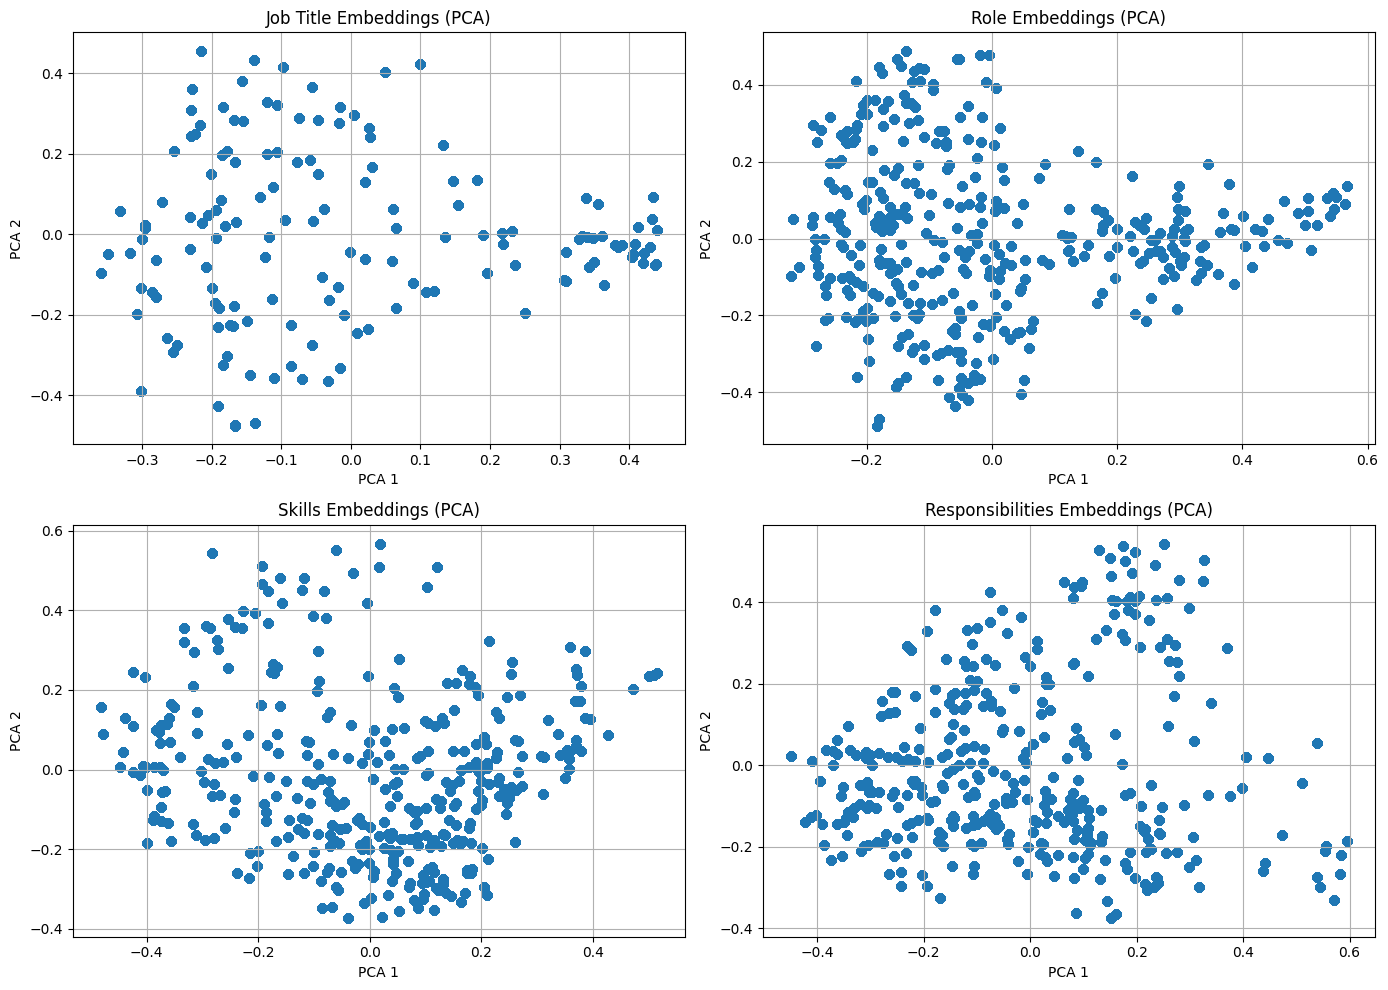

In [82]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

titles = [
    "Job Title Embeddings (PCA)",
    "Role Embeddings (PCA)",
    "Skills Embeddings (PCA)",
    "Responsibilities Embeddings (PCA)"
]

data_2d = [job_title_2d, role_2d, skills_2d, respons_2d]

for ax, title, data in zip(axes, titles, data_2d):
    ax.scatter(data[:, 0], data[:, 1], alpha=0.6)
    ax.set_title(title)
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")
    ax.grid(True)

plt.tight_layout()
plt.show()

La visualització mostra les dues primeres components principals (PCA) dels embeddings obtinguts.  Aquests embedding tenen  384 dimensions, tot i que en el gràfic només se’n mostren dues — les que concentren la màxima variabilitat lineal de les dades. Això permet fer una representació simplificada per a l’anàlisi visual, però no reflecteix tota la riquesa continguda en els vectors originals.

Observem que, en general, no hi ha agrupaments clars o separacions netes en cap dels camps representats. Els punts es distribueixen de forma més o menys dispersa, especialment en els embeddings de "Skills" i "Responsibilities", que presenten una gran variabilitat i soroll, la qual cosa és esperable donada la diversitat de perfils professionals. En el cas de "Job Title" i "Role", la concentració al centre és lleugerament major, però encara sense estructures ben definides.

Tot i aquesta aparent manca de separació en dues dimensions, cal tenir en compte que els embeddings conserven informació distribuïda en moltes més dimensions. És perfectament possible que patrons útils per a la predicció del salari existeixin en combinacions de dimensions més complexes, no visibles en aquesta projecció 2D. És a dir, encara que la representació visual no mostri agrupaments forts, els models de regressió poden aprofitar relacions latents entre dimensions per fer prediccions més precises. Ho veiem a continuació:

> _disclaimer: Hem triat un altre camí per l'algorisme no supervisat, però podria ser interessant fer aquí un clustering dels embeddings previ a continuar._

Ja visualitzats, els afegim al dataframe:

In [196]:
job_title_emb = pl.DataFrame(job_title_embedding, schema=[f"JobTitle_emb_{i}" for i in range(job_title_embedding.shape[1])])
role_emb = pl.DataFrame(role_embedding, schema=[f"Role_emb_{i}" for i in range(role_embedding.shape[1])])
job_desc_emb = pl.DataFrame(job_description_embedding, schema=[f"JobDesc_emb_{i}" for i in range(job_description_embedding.shape[1])])
skills_emb = pl.DataFrame(skills_embedding, schema=[f"Skills_emb_{i}" for i in range(skills_embedding.shape[1])])
respons_emb = pl.DataFrame(responsabilities_embedding, schema=[f"Respons_emb_{i}" for i in range(responsabilities_embedding.shape[1])])

In [205]:
job_title_emb.write_csv("dataset/job_title_emb.csv")
role_emb.write_csv("dataset/role_emb.csv")
job_desc_emb.write_csv("dataset/job_desc_emb.csv")
skills_emb.write_csv("dataset/skills_emb.csv")
respons_emb.write_csv("dataset/respons_emb.csv")

In [202]:
job_title_emb.shape, role_emb.shape, job_desc_emb.shape, skills_emb.shape, respons_emb.shape

((1615940, 384),
 (1615940, 384),
 (1615940, 384),
 (1615940, 384),
 (1615940, 384))

In [204]:
job_descriptions = job_descriptions.hstack(job_title_emb)

In [ ]:
job_descriptions = job_descriptions.hstack(role_emb)

In [207]:
job_descriptions = job_descriptions.hstack(job_desc_emb)

In [208]:
job_descriptions = job_descriptions.hstack(skills_emb)

In [209]:
job_descriptions = job_descriptions.hstack(respons_emb)

In [211]:
job_descriptions = job_descriptions.drop([
    "Job Title",
    "Role",
    "Job Description",
    "skills",
    "Responsibilities"
])

In [ ]:
job_descriptions.write_csv("dataset/job_descriptions_processed.csv")

In [2]:
job_descriptions = pl.read_csv("dataset/job_descriptions_processed.csv")

Ara que ja tenim tot el processat necessari procedim amb l'algorisme supervisat per predir el salari:

In [ ]:
# !pip install xgboost

In [ ]:
import pandas as pd
import xgboost as xgb
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


Ara amb el número d'elements que tenim, entre les variables degut als embeddings i el número de mostres, treballar amb aquest dataset és complicat, pel que agafarem un sample random de 10000 mostres:

In [ ]:
job_description_sample = job_descriptions.sample(n=10000, with_replacement=False, seed=42)

In [5]:
job_description_sample.head()

Experience,Company Size,Salary,Qualifications_num,Work_Type_num,Country_Encoded,Gender_Encoded,JobTitle_emb_0,JobTitle_emb_1,JobTitle_emb_2,JobTitle_emb_3,JobTitle_emb_4,JobTitle_emb_5,JobTitle_emb_6,JobTitle_emb_7,JobTitle_emb_8,JobTitle_emb_9,JobTitle_emb_10,JobTitle_emb_11,JobTitle_emb_12,JobTitle_emb_13,JobTitle_emb_14,JobTitle_emb_15,JobTitle_emb_16,JobTitle_emb_17,JobTitle_emb_18,JobTitle_emb_19,JobTitle_emb_20,JobTitle_emb_21,JobTitle_emb_22,JobTitle_emb_23,JobTitle_emb_24,JobTitle_emb_25,JobTitle_emb_26,JobTitle_emb_27,JobTitle_emb_28,JobTitle_emb_29,…,Respons_emb_347,Respons_emb_348,Respons_emb_349,Respons_emb_350,Respons_emb_351,Respons_emb_352,Respons_emb_353,Respons_emb_354,Respons_emb_355,Respons_emb_356,Respons_emb_357,Respons_emb_358,Respons_emb_359,Respons_emb_360,Respons_emb_361,Respons_emb_362,Respons_emb_363,Respons_emb_364,Respons_emb_365,Respons_emb_366,Respons_emb_367,Respons_emb_368,Respons_emb_369,Respons_emb_370,Respons_emb_371,Respons_emb_372,Respons_emb_373,Respons_emb_374,Respons_emb_375,Respons_emb_376,Respons_emb_377,Respons_emb_378,Respons_emb_379,Respons_emb_380,Respons_emb_381,Respons_emb_382,Respons_emb_383
i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
4,12708,60000,2,2,163,3,-0.023729,-0.006253,-0.064721,0.049854,-0.069985,-0.070965,0.076118,0.010782,-0.077302,0.029883,-0.024837,-0.053917,-0.034521,0.014293,-0.059813,0.114196,-0.020032,-0.039195,-0.021483,-0.096931,-0.082296,-0.011561,-0.072718,-0.031736,0.049183,0.071402,0.012285,0.003823,-0.015464,-0.060499,…,0.043364,-0.037226,-0.014063,0.005996,0.012802,0.010138,-0.068349,0.059346,-0.077139,0.020961,0.035226,0.001296,0.051943,-0.012442,0.074873,-0.016029,-0.003544,-0.057118,0.048499,-0.065004,-0.017808,0.043535,0.000349,-0.014194,-0.042861,0.030741,0.068374,0.012222,0.094239,-0.048366,-0.002851,0.030049,-0.033713,0.032476,-0.040257,-0.011477,0.015551
0,110834,63000,1,3,201,3,-0.025007,0.0352,-0.075794,-0.030906,-0.086681,-0.075983,0.055417,0.021455,-0.111466,-0.005405,0.001546,-0.060428,-0.014393,0.0643351,-0.039199,-0.023737,-0.029586,0.027073,0.024969,-0.100092,-0.00365,0.106419,-0.001246,-0.047356,-0.021862,0.005649,-0.02913,-0.044533,-0.018846,0.041471,…,0.092279,-0.03129,-0.028366,0.008097,0.088081,0.014439,0.024579,-0.067148,0.008344,0.025529,0.055352,-0.047783,0.032279,-0.013836,0.004669,-0.019732,0.020645,-0.124807,-0.011221,0.0008,0.060769,0.01446,0.05139,0.0382137,0.039835,-0.043632,0.027116,-0.017121,0.0493,0.013614,0.033131,0.09554,0.010774,-0.061633,-0.069448,0.015211,-0.013283
2,64883,61000,1,2,56,1,-0.065963,0.016548,-0.087554,0.027657,-0.090969,-0.048829,0.082787,0.017757,0.001975,0.027965,-0.039876,-0.049711,0.008022,0.020144,-0.080984,0.075379,-0.008997,-0.000384,-0.010492,-0.111664,-0.075876,0.008966,-0.02151,0.009193,-0.04364,-0.041909,-0.018613,0.034311,0.047053,-0.107972,…,0.063831,0.00121,0.057661,0.009064,0.02554,-0.020446,-0.043051,0.012795,0.083324,0.070218,-0.019043,0.074743,0.000253,-0.045145,0.076471,-0.035899,-0.025042,0.011064,-0.071239,-0.013738,0.014508,-0.040489,-0.094935,0.070866,0.00673,-0.071501,0.041401,0.060603,-0.046266,0.023618,-0.061577,-0.030777,0.030202,0.021841,0.007829,0.097285,-0.028992
0,126260,65000,3,4,193,1,-0.065237,0.042516,-0.01973,-0.023544,-0.058087,-0.101782,0.04509,0.081806,-0.077044,-0.033685,-0.056765,-0.025133,0.004785,-0.023139,0.007908,0.000435,-0.06394,0.015752,0.016595,-0.150238,-0.046981,-0.039231,-0.015778,-0.073194,0.084805,0.078167,0.078097,-0.00822,0.0627,-0.060887,…,0.005082,0.007188,0.051749,-0.000487,-0.013333,0.0494516,0.022935,-0.019368,0.039526,-0.03871,0.00447,-0.027017,-0.006135,-0.009354,0.058162,0.051421,-0.009708,-0.030382,0.065049,-0.045014,0.031679,0.010062,-0.04246,-0.042214,-0.052057,0.008545,-0.039834,0.012

In [6]:
job_description_sample.write_csv("dataset/job_description_sample.csv")

In [17]:
job_descriptions_sample = pl.read_csv("dataset/job_description_sample.csv")

Previ a fer les prediccions pertinents ens cal normalitzar les variables anteriors per adequar-les al rang de valors dels embeddings amb MinMaxScaler:

In [26]:
job_descriptions_pandas = job_description_sample.to_pandas()

In [27]:
columns_to_normalize = [
    "Experience",
    "Company Size",
    "Country_Encoded",
    "Gender_Encoded",
    "Work_Type_num",
    "Qualifications_num"
]

In [28]:
scaler = MinMaxScaler(feature_range=(-1, 1))
job_descriptions_pandas[columns_to_normalize] = scaler.fit_transform(job_descriptions_pandas[columns_to_normalize])

In [30]:
X = job_descriptions_pandas.drop(columns=["Salary"])
y = job_descriptions_pandas["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [34]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    "Decision Tree": DecisionTreeRegressor(max_depth=8, random_state=42),
    "Support Vector Regressor": SVR(C=1.0, epsilon=0.1, kernel='rbf'),
    "XGBoost": xgb.XGBRegressor(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='reg:squarederror',
        random_state=42
    )
}

In [37]:
results = {}

for name, model in tqdm(models.items()):
    pipeline = Pipeline([
        ('regressor', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"RMSE": rmse, "R²": r2}

100%|██████████| 5/5 [05:12<00:00, 62.52s/it] 


In [38]:
results_df = pd.DataFrame(results).T
print(results_df)

                                 RMSE        R²
Linear Regression         3283.489178 -0.077099
Random Forest             3220.980090 -0.036479
Decision Tree             3289.045428 -0.080748
Support Vector Regressor  3164.375033 -0.000369
XGBoost                   3308.819336 -0.093782


Provarem també amb només les features que no son text i amb només les que són text:

**No textuals**:

In [39]:
job_description_sample_numerical = job_description_sample.select([
    "Experience",
    "Company Size",
    "Country_Encoded",
    "Gender_Encoded",
    "Work_Type_num",
    "Qualifications_num",
    "Salary"])

In [40]:
job_description_sample_numerical.head()

Experience,Company Size,Country_Encoded,Gender_Encoded,Work_Type_num,Qualifications_num,Salary
i64,i64,i64,i64,i64,i64,i64
4,12708,163,3,2,2,60000
0,110834,201,3,3,1,63000
2,64883,56,1,2,1,61000
0,126260,193,1,4,3,65000
5,28512,80,1,3,1,61000


In [41]:
job_descriptions_pandas = job_description_sample_numerical.to_pandas()
X = job_descriptions_pandas.drop(columns=["Salary"])
y = job_descriptions_pandas["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    "Decision Tree": DecisionTreeRegressor(max_depth=8, random_state=42),
    "Support Vector Regressor": SVR(C=1.0, epsilon=0.1, kernel='rbf'),
    "XGBoost": xgb.XGBRegressor(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='reg:squarederror',
        random_state=42
    )
}

En aquest cas incloem la normalització com a part del pipeline d'entrenament:

In [43]:
results = {}

for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"RMSE": rmse, "R²": r2}

In [44]:
results_df = pd.DataFrame(results).T
print(results_df)

                                 RMSE        R²
Linear Regression         3171.650986 -0.001566
Random Forest             3194.922405 -0.016318
Decision Tree             3286.448498 -0.075382
Support Vector Regressor  3169.624874 -0.000287
XGBoost                   3248.134277 -0.050454


In [47]:
job_description_sample_textual = job_description_sample.drop([
    "Experience",
    "Company Size",
    "Country_Encoded",
    "Gender_Encoded",
    "Work_Type_num",
    "Qualifications_num"])

In [48]:
job_description_sample_textual.head()

Salary,JobTitle_emb_0,JobTitle_emb_1,JobTitle_emb_2,JobTitle_emb_3,JobTitle_emb_4,JobTitle_emb_5,JobTitle_emb_6,JobTitle_emb_7,JobTitle_emb_8,JobTitle_emb_9,JobTitle_emb_10,JobTitle_emb_11,JobTitle_emb_12,JobTitle_emb_13,JobTitle_emb_14,JobTitle_emb_15,JobTitle_emb_16,JobTitle_emb_17,JobTitle_emb_18,JobTitle_emb_19,JobTitle_emb_20,JobTitle_emb_21,JobTitle_emb_22,JobTitle_emb_23,JobTitle_emb_24,JobTitle_emb_25,JobTitle_emb_26,JobTitle_emb_27,JobTitle_emb_28,JobTitle_emb_29,JobTitle_emb_30,JobTitle_emb_31,JobTitle_emb_32,JobTitle_emb_33,JobTitle_emb_34,JobTitle_emb_35,…,Respons_emb_347,Respons_emb_348,Respons_emb_349,Respons_emb_350,Respons_emb_351,Respons_emb_352,Respons_emb_353,Respons_emb_354,Respons_emb_355,Respons_emb_356,Respons_emb_357,Respons_emb_358,Respons_emb_359,Respons_emb_360,Respons_emb_361,Respons_emb_362,Respons_emb_363,Respons_emb_364,Respons_emb_365,Respons_emb_366,Respons_emb_367,Respons_emb_368,Respons_emb_369,Respons_emb_370,Respons_emb_371,Respons_emb_372,Respons_emb_373,Respons_emb_374,Respons_emb_375,Respons_emb_376,Respons_emb_377,Respons_emb_378,Respons_emb_379,Respons_emb_380,Respons_emb_381,Respons_emb_382,Respons_emb_383
i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
60000,-0.023729,-0.006253,-0.064721,0.049854,-0.069985,-0.070965,0.076118,0.010782,-0.077302,0.029883,-0.024837,-0.053917,-0.034521,0.014293,-0.059813,0.114196,-0.020032,-0.039195,-0.021483,-0.096931,-0.082296,-0.011561,-0.072718,-0.031736,0.049183,0.071402,0.012285,0.003823,-0.015464,-0.060499,-0.051531,-0.022433,0.076609,0.088858,-0.035471,-0.022403,…,0.043364,-0.037226,-0.014063,0.005996,0.012802,0.010138,-0.068349,0.059346,-0.077139,0.020961,0.035226,0.001296,0.051943,-0.012442,0.074873,-0.016029,-0.003544,-0.057118,0.048499,-0.065004,-0.017808,0.043535,0.000349,-0.014194,-0.042861,0.030741,0.068374,0.012222,0.094239,-0.048366,-0.002851,0.030049,-0.033713,0.032476,-0.040257,-0.011477,0.015551
63000,-0.025007,0.0352,-0.075794,-0.030906,-0.086681,-0.075983,0.055417,0.021455,-0.111466,-0.005405,0.001546,-0.060428,-0.014393,0.0643351,-0.039199,-0.023737,-0.029586,0.027073,0.024969,-0.100092,-0.00365,0.106419,-0.001246,-0.047356,-0.021862,0.005649,-0.02913,-0.044533,-0.018846,0.041471,-0.011065,-0.044171,0.040295,-0.079643,0.008854,0.044097,…,0.092279,-0.03129,-0.028366,0.008097,0.088081,0.014439,0.024579,-0.067148,0.008344,0.025529,0.055352,-0.047783,0.032279,-0.013836,0.004669,-0.019732,0.020645,-0.124807,-0.011221,0.0008,0.060769,0.01446,0.05139,0.0382137,0.039835,-0.043632,0.027116,-0.017121,0.0493,0.013614,0.033131,0.09554,0.010774,-0.061633,-0.069448,0.015211,-0.013283
61000,-0.065963,0.016548,-0.087554,0.027657,-0.090969,-0.048829,0.082787,0.017757,0.001975,0.027965,-0.039876,-0.049711,0.008022,0.020144,-0.080984,0.075379,-0.008997,-0.000384,-0.010492,-0.111664,-0.075876,0.008966,-0.02151,0.009193,-0.04364,-0.041909,-0.018613,0.034311,0.047053,-0.107972,-0.013247,-0.010142,0.127801,-0.028564,0.021329,0.062755,…,0.063831,0.00121,0.057661,0.009064,0.02554,-0.020446,-0.043051,0.012795,0.083324,0.070218,-0.019043,0.074743,0.000253,-0.045145,0.076471,-0.035899,-0.025042,0.011064,-0.071239,-0.013738,0.014508,-0.040489,-0.094935,0.070866,0.00673,-0.071501,0.041401,0.060603,-0.046266,0.023618,-0.061577,-0.030777,0.030202,0.021841,0.007829,0.097285,-0.028992
65000,-0.065237,0.042516,-0.01973,-0.023544,-0.058087,-0.101782,0.04509,0.081806,-0.077044,-0.033685,-0.056765,-0.025133,0.004785,-0.023139,0.007908,0.000435,-0.06394,0.015752,0.016595,-0.150238,-0.046981,-0.039231,-0.015778,-0.073194,0.084805,0.078167,0.078097,-0.00822,0.0627,-0.060887,-0.104498,0.000326,0.036529,-0.003384,-0.091373,0.032302,…,0.005082,0.007188,0.051749,-0.000487,-0.013333,0.0494516,0.022935,-0.019368,0.039526,-0.03871,0.

In [49]:
job_descriptions_pandas = job_description_sample_textual.to_pandas()
X = job_descriptions_pandas.drop(columns=["Salary"])
y = job_descriptions_pandas["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    "Decision Tree": DecisionTreeRegressor(max_depth=8, random_state=42),
    "Support Vector Regressor": SVR(C=1.0, epsilon=0.1, kernel='rbf'),
    "XGBoost": xgb.XGBRegressor(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='reg:squarederror',
        random_state=42
    )
}

In [52]:
results = {}

for name, model in tqdm(models.items()):
    pipeline = Pipeline([
        ('regressor', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"RMSE": rmse, "R²": r2}

100%|██████████| 5/5 [04:25<00:00, 53.02s/it] 


In [53]:
results_df = pd.DataFrame(results).T
print(results_df)

                                 RMSE        R²
Linear Regression         3288.615585 -0.076800
Random Forest             3239.530166 -0.044896
Decision Tree             3236.915868 -0.043210
Support Vector Regressor  3169.637657 -0.000295
XGBoost                   3264.729736 -0.061215


## Anàlisi dels resultats:

Hem executat diversos models supervisats de regressió en 3 casos diferents: només característiques no textuals, només embeddings de camps textuals, combinació de totes les variables.  
Els resultats mostren que cap dels models ha estat capaç de predir el salari de manera significativa. En tots els casos, el valor de R² és negatiu, fet que indica que els models ho fan pitjor que una simple mitjana del salari. Això implica que la informació proporcionada pel conjunt de dades —tant estructurada com semàntica— no conté una relació prou predictiva amb el salari. Tot i l’ús de models potents com XGBoost i embeddings semàntics, les dades actuals no són suficients per predir el salari de manera fiable. Per avançar, caldrà repensar l’enfocament.

És possible que els textos analitzats siguin massa genèrics, amb una escassa variabilitat entre ells, fet que dificulta que els models trobin patrons útils per discriminar nivells salarials. A més, pot haver-hi una alta variabilitat de salaris dins d’un mateix rol, funció o títol professional. 

Com a properes passes, es podrien considerar les següents:

* Analitzar la distribució del salari i estudiar transformacions per reduir la dispersió i facilitar la tasca dels models.

* Reformular el problema com una classificació en trams salarials (per exemple, baix, mitjà, alt), en lloc de fer regressió directa sobre una variable contínua tan sensible i variable.

* Explorar tècniques de clustering, que permetin agrupar feines similars abans de fer prediccions. 

* Incorporar noves fonts de dades, com la identificació de l’empresa, la indústria, la ubicació exacta o el nivell jeràrquic, que podrien afegir informació contextual crítica.
